# **OBJECTIVES:**

- ### *To Predict student drop-offs or engagement levels based on this historical data to helps the company take proactive measures to improve retention and participation*

#### **Importing the necessary libraries**

In [747]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wa
wa.filterwarnings("ignore")

#### **Loading the dataset**

In [748]:
df = pd.read_csv("SLU-Opportunity-Wise-Data.csv")


#### **Viewing the dataset head**

In [749]:
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,06/14/2023 12:36:09,11/03/2022 18:30:39
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,05/01/2023 06:08:21,11/03/2022 18:30:39
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,05/11/2023 1085640:21:29,11/03/2022 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,10/09/2023 22:02:42,11/03/2022 18:30:39
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,01/06/2023 15:40:10,11/03/2022 18:30:39


### **Counting the number of columns in the dataset**

In [750]:
count_columns = df.shape[1]
print('Number of columns in the dataset is:',count_columns)

Number of columns in the dataset is: 16


#### **Counting the number of rows in the dataset**

In [751]:
count_rows = df.shape[0]
print('Number of rows in the dataset is:',count_rows)

Number of rows in the dataset is: 8558


#### **Finding the datatypes in the dataset**

In [752]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8558 non-null   object
 1   Opportunity Id           8558 non-null   object
 2   Opportunity Name         8558 non-null   object
 3   Opportunity Category     8558 non-null   object
 4   Opportunity End Date     8558 non-null   object
 5   First Name               8558 non-null   object
 6   Date of Birth            8558 non-null   object
 7   Gender                   8558 non-null   object
 8   Country                  8558 non-null   object
 9   Institution Name         8553 non-null   object
 10  Current/Intended Major   8553 non-null   object
 11  Entry created at         8558 non-null   object
 12  Status Description       8558 non-null   object
 13  Status Code              8558 non-null   int64 
 14  Apply Date               8558 non-null  

#### **Viewing the last 10 rows of the dataset**

In [753]:
df.tail(10)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
8548,02/27/2024 24:19:05,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Kofi,10/26/1990,Male,Ghana,College of Health and Well-Being Kintampo,Medical Laboratory Science,03/11/2024 12:03:14,Team Allocated,1070,02/27/2024 24:49:24,03/08/2024 14:00:00
8549,04/30/2023 18:22:02,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Subhash Chandra,05/12/2001,Male,India,Vishnu Institute of Technology,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,02/12/2024 20:57:02,03/08/2024 14:00:00
8550,12/27/2023 23:52:13,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Saikrishna,01/18/1999,Male,United States,Saint Louis university,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,03/08/2024 07:25:42,03/08/2024 14:00:00
8551,07/09/2023 06:53:09,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Lalith Adithya Reddy,09/17/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:03:14,Applied,1010,02/09/2024 16:57:57,NaN
8552,01/06/2024 17:04:30,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Kaustubh,07/06/2003,Male,India,P. V. G Nashik,Artificial Intelligence and Data Science,03/11/2024 12:03:14,Team Allocated,1070,02/12/2024 03:01:56,03/08/2024 14:00:00
8553,03/05/2024 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Selam,10/14/2006,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,03/11/2024 12:03:14,Team Allocated,1070,03/05/2024 17:10:41,03/08/2024 14:00:00
8554,03/06/2024 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Gowri Sailesh,05/18/1999,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,03/06/2024 18:22:11,03/08/2024 14:00:00
8555,02/29/2024 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Abiola,03/16/1999,Male,Nigeria,Tai Solarin university of Education,Political Science,03/11/2024 12:03:14,Team Allocated,1070,02/29/2024 15:10:06,03/08/2024 14:00:00
8556,12/23/2023 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,venumadhavi,06/05/1997,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,02/27/2024 06:48:47,03/08/2024 14:00:00
8557,06/01/2023 13:22:01,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Prashanth Reddy,11/30/2000,Male,India,Saint Louis University,Artificial Intelligence,03/11/2024 12:03:14,Team Allocated,1070,02/16/2024 16:33:00,03/08/2024 14:00:00


## **Data cleaning**
#### **Since dropping rows with NaN values in specific columns removes almost half of the dataset I choose to replace the rows with NaN values with the next value in that specific column**

In [754]:
df = df.fillna(method='bfill')
print("After dropping null values, the number of rows is:", df.shape[0])

After dropping null values, the number of rows is: 8558


In [770]:
print(df['Status Description'].unique()) 

['Started' 'Team Allocated' 'Waitlisted' 'Withdraw' 'Rewards Award'
 'Dropped Out' 'Rejected' 'Applied']


In [755]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Learner SignUp DateTime  8558 non-null   object
 1   Opportunity Id           8558 non-null   object
 2   Opportunity Name         8558 non-null   object
 3   Opportunity Category     8558 non-null   object
 4   Opportunity End Date     8558 non-null   object
 5   First Name               8558 non-null   object
 6   Date of Birth            8558 non-null   object
 7   Gender                   8558 non-null   object
 8   Country                  8558 non-null   object
 9   Institution Name         8558 non-null   object
 10  Current/Intended Major   8558 non-null   object
 11  Entry created at         8558 non-null   object
 12  Status Description       8558 non-null   object
 13  Status Code              8558 non-null   int64 
 14  Apply Date               8558 non-null  

In [756]:
df.tail(10)

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
8548,02/27/2024 24:19:05,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Kofi,10/26/1990,Male,Ghana,College of Health and Well-Being Kintampo,Medical Laboratory Science,03/11/2024 12:03:14,Team Allocated,1070,02/27/2024 24:49:24,03/08/2024 14:00:00
8549,04/30/2023 18:22:02,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Subhash Chandra,05/12/2001,Male,India,Vishnu Institute of Technology,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,02/12/2024 20:57:02,03/08/2024 14:00:00
8550,12/27/2023 23:52:13,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Saikrishna,01/18/1999,Male,United States,Saint Louis university,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,03/08/2024 07:25:42,03/08/2024 14:00:00
8551,07/09/2023 06:53:09,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Lalith Adithya Reddy,09/17/2000,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:03:14,Applied,1010,02/09/2024 16:57:57,03/08/2024 14:00:00
8552,01/06/2024 17:04:30,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Kaustubh,07/06/2003,Male,India,P. V. G Nashik,Artificial Intelligence and Data Science,03/11/2024 12:03:14,Team Allocated,1070,02/12/2024 03:01:56,03/08/2024 14:00:00
8553,03/05/2024 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Selam,10/14/2006,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,03/11/2024 12:03:14,Team Allocated,1070,03/05/2024 17:10:41,03/08/2024 14:00:00
8554,03/06/2024 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Gowri Sailesh,05/18/1999,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,03/06/2024 18:22:11,03/08/2024 14:00:00
8555,02/29/2024 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Abiola,03/16/1999,Male,Nigeria,Tai Solarin university of Education,Political Science,03/11/2024 12:03:14,Team Allocated,1070,02/29/2024 15:10:06,03/08/2024 14:00:00
8556,12/23/2023 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,venumadhavi,06/05/1997,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:03:14,Team Allocated,1070,02/27/2024 06:48:47,03/08/2024 14:00:00
8557,06/01/2023 13:22:01,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,03/08/2024 11:30:00,Prashanth Reddy,11/30/2000,Male,India,Saint Louis University,Artificial Intelligence,03/11/2024 12:03:14,Team Allocated,1070,02/16/2024 16:33:00,03/08/2024 14:00:00


# **Encoding Categorical DateTime Variables**

In [757]:
# ...existing code...

# Ensure the column is in datetime format
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')
df['signup_year'] = df['Learner SignUp DateTime'].dt.year
df['signup_month'] = df['Learner SignUp DateTime'].dt.month
df['signup_day'] = df['Learner SignUp DateTime'].dt.day
df['signup_hour'] = df['Learner SignUp DateTime'].dt.hour
df['signup_minute'] = df['Learner SignUp DateTime'].dt.minute
df['signup_second'] = df['Learner SignUp DateTime'].dt.second

# Ensure the column is in datetime format
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['apply_year'] = df['Apply Date'].dt.year
df['apply_month'] = df['Apply Date'].dt.month
df['apply_day'] = df['Apply Date'].dt.day
df['apply_hour'] = df['Apply Date'].dt.hour
df['apply_minute'] = df['Apply Date'].dt.minute
df['apply_second'] = df['Apply Date'].dt.second

# Ensure the column is in datetime format
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce')
df['end_year'] = df['Opportunity End Date'].dt.year
df['end_month'] = df['Opportunity End Date'].dt.month
df['end_day'] = df['Opportunity End Date'].dt.day
df['end_hour'] = df['Opportunity End Date'].dt.hour
df['end_minute'] = df['Opportunity End Date'].dt.minute
df['end_second'] = df['Opportunity End Date'].dt.second

# ...existing code...

In [772]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8263 non-null   datetime64[ns]
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     7296 non-null   datetime64[ns]
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   datetime64[ns]
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8558 non-null   object        
 10  Current/Intended Major   8558 non-null   object        
 11  Entry created at         8558 non-null   object        
 12  Status Description       8558 non-

In [758]:
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,apply_day,apply_hour,apply_minute,apply_second,end_year,end_month,end_day,end_hour,end_minute,end_second
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,...,14.0,12.0,36.0,9.0,2024.0,6.0,29.0,18.0,52.0,39.0
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,...,1.0,6.0,8.0,21.0,2024.0,6.0,29.0,18.0,52.0,39.0
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,...,NaN,NaN,NaN,NaN,2024.0,6.0,29.0,18.0,52.0,39.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,...,9.0,22.0,2.0,42.0,2024.0,6.0,29.0,18.0,52.0,39.0
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,...,6.0,15.0,40.0,10.0,2024.0,6.0,29.0,18.0,52.0,39.0


### **Filling NaN date time columns with a zero value**

In [759]:
# After extracting features
datetime_cols = [
    'signup_year', 'signup_month', 'signup_day', 'signup_hour', 'signup_minute', 'signup_second',
    'apply_year', 'apply_month', 'apply_day', 'apply_hour', 'apply_minute', 'apply_second',
    'end_year', 'end_month', 'end_day', 'end_hour', 'end_minute', 'end_second'
]

df[datetime_cols] = df[datetime_cols].fillna(0)  # or use 0 if you prefer

In [760]:
df.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,...,apply_day,apply_hour,apply_minute,apply_second,end_year,end_month,end_day,end_hour,end_minute,end_second
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,01/12/2001,Female,Pakistan,Nwihs,...,14.0,12.0,36.0,9.0,2024.0,6.0,29.0,18.0,52.0,39.0
1,2023-05-01 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,...,1.0,6.0,8.0,21.0,2024.0,6.0,29.0,18.0,52.0,39.0
2,2023-04-09 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,...,0.0,0.0,0.0,0.0,2024.0,6.0,29.0,18.0,52.0,39.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,11/01/1999,Female,United States,Saint Louis University,...,9.0,22.0,2.0,42.0,2024.0,6.0,29.0,18.0,52.0,39.0
4,2023-01-06 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,...,6.0,15.0,40.0,10.0,2024.0,6.0,29.0,18.0,52.0,39.0


In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8263 non-null   datetime64[ns]
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     7296 non-null   datetime64[ns]
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   object        
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8558 non-null   object        
 10  Current/Intended Major   8558 non-null   object        
 11  Entry created at         8558 non-null   object        
 12  Status Description       8558 non-

In [762]:
df.corr(numeric_only=True)

,Status Code,signup_year,signup_month,signup_day,signup_hour,signup_minute,signup_second,apply_year,apply_month,apply_day,apply_hour,apply_minute,apply_second,end_year,end_month,end_day,end_hour,end_minute,end_second
Status Code,1.000000,0.013459,0.090033,-0.050215,0.017568,0.002769,0.012728,0.035867,0.226640,-0.065995,0.028693,0.027473,0.019699,0.075652,0.347975,0.457223,-0.034078,0.602223,0.471059
signup_year,0.013459,1.000000,0.272420,0.325842,0.326343,0.306415,0.299665,0.197699,0.073162,0.054146,0.125552,0.073252,0.072673,0.006305,0.003194,0.001219,0.010200,-0.000621,0.000608
signup_month,0.090033,0.272420,1.000000,0.215606,0.080921,0.104973,0.112732,0.041731,0.494128,0.032102,0.023176,0.016739,0.018609,-0.041362,-0.024539,-0.012585,-0.022672,-0.014932,0.016242
signup_day,-0.050215,0.325842,0.215606,1.000000,0.087476,0.074298,0.097408,0.053663,0.060945,0.399562,0.035186,0.006363,0.029793,0.010744,0.016789,-0.000174,-0.003799,0.003000,-0.015440
signup_hour,0.017568,0.326343,0.080921,0.087476,1.000000,0.094013,0.104098,0.021718,0.029850,-0.013105,0.357668,0.007019,0.024563,-0.019095,-0.012021,-0.006446,-0.015194,-0.003222,0.000746
signup_minute,0.002769,0.306415,0.104973,0.074298,0.094013,1.000000,0.087432,0.038770,0.026202,-0.010893,0.045965,-0.022111,0.019616,-0.007469,-0.006436,-0.005437,-0.000774,0.004262,-0.003109
signup_second,0.012728,0.299665,0.112732,0.097408,0.104098,0.087432,1.000000,0.050426,0.034998,0.011977,0.028288,0.015543,0.023709,0.007317,0.008072,0.006344,0.012036,0.009035,0.009483
apply_year,0.035867,0.197699,0.041731,0.053663,0.021718,0.038770,0.050426,1.000000,0.219520,0.322647,0.315075,0.307525,0.302711,0.010137,-0.001989,0.021873,0.015239,0.013063,0.013108
apply_month,0.226640,0.073162,0.494128,0.060945,0.029850,0.026202,0.034998,0.219520,1.000000,0.178969,0.088041,0.085743,0.071373,-0.039411,0.065090,0.078149,-0.014163,0.116488,0.175033
apply_day,-0.065995,0.054146,0.032102,0.399562,-0.013105,-0.010893,0.011977,0.322647,0.178969,1.000000,0.083261,0.094330,0.097104,0.038100,0.014005,0.034616,0.036991,0.016397,0.009855


# Variables for dropoffs and engagement
- ## Status description
- ## Status code

| Status Description | Status Code |
| ------------------ | ----------- |
| Applied            | 1010        |
| Rejected           | 1030        |
| Waitlisted         | 1040        |
| Dropped Out        | 1050        |
| Team Allocated     | 1070        |
| Started            | 1080        |
| Withdraw           | 1110        |
| Rewards Award      | 1120        |

Inference for engagement levels:

Low engagement / drop-off: Dropped Out (1050), Withdraw (1110), Rejected (1030)

Potential / mid-engagement: Applied (1010), Waitlisted (1040)

Active engagement: Team Allocated (1070), Started (1080), Rewards Award (1120)

In [763]:
# Let's explore the unique values of Status Description and Status Code to infer patterns of engagement vs drop-off
status_summary = df[['Status Description', 'Status Code']].drop_duplicates().sort_values('Status Code')

status_summary.to_dict(orient='records')

[{'Status Description': 'Applied', 'Status Code': 1010},
 {'Status Description': 'Rejected', 'Status Code': 1030},
 {'Status Description': 'Waitlisted', 'Status Code': 1040},
 {'Status Description': 'Dropped Out', 'Status Code': 1050},
 {'Status Description': 'Team Allocated', 'Status Code': 1070},
 {'Status Description': 'Started', 'Status Code': 1080},
 {'Status Description': 'Withdraw', 'Status Code': 1110},
 {'Status Description': 'Rewards Award', 'Status Code': 1120}]

## I’ll profile drop-off vs engaged students:

Count and % of each status

Break down by key variables (e.g., country, gender, major)

Identify patterns in timing (e.g., do drop-offs happen soon after signup?)

| Status Description | Count | % of Total |
| ------------------ | ----- | ---------- |
| **Rejected**       | 3,569 | 41.7%      |
| **Team Allocated** | 3,276 | 38.28%     |
| **Started**        | 767   | 8.96%      |
| **Dropped Out**    | 617   | 7.21%      |
| **Waitlisted**     | 109   | 1.27%      |
| **Applied**        | 105   | 1.23%      |
| **Withdraw**       | 86    | 1.0%       |
| **Rewards Award**  | 29    | 0.34%      |

### ✅ Drop-off markers (Dropped Out + Withdraw) → ~8.2%
### ✅ Active/engaged markers (Team Allocated + Started + Rewards Award) → ~47.6%
### ✅ High rejection rate → ~41.7% — a huge early-stage filter

In [764]:


# Analyze distribution of statuses
status_counts = df['Status Description'].value_counts().reset_index()
status_counts.columns = ['Status Description', 'Count']
status_counts['Percentage'] = (status_counts['Count'] / len(df) * 100).round(2)

status_counts.to_dict(orient='records')


[{'Status Description': 'Rejected', 'Count': 3569, 'Percentage': 41.7},
 {'Status Description': 'Team Allocated', 'Count': 3276, 'Percentage': 38.28},
 {'Status Description': 'Started', 'Count': 767, 'Percentage': 8.96},
 {'Status Description': 'Dropped Out', 'Count': 617, 'Percentage': 7.21},
 {'Status Description': 'Waitlisted', 'Count': 109, 'Percentage': 1.27},
 {'Status Description': 'Applied', 'Count': 105, 'Percentage': 1.23},
 {'Status Description': 'Withdraw', 'Count': 86, 'Percentage': 1.0},
 {'Status Description': 'Rewards Award', 'Count': 29, 'Percentage': 0.34}]

# Next steps I propose:
### 1️⃣ Analyze drop-off patterns by demographics (country, gender, major)
### 2️⃣ Timing patterns: When do drop-offs happen relative to sign-up?
### 3️⃣ Build a predictive framework: e.g., logistic regression to flag likely drop-offs

# 📌 Expected Drop-off Patterns by Demographics
#### 1️⃣ Country
In educational opportunity datasets:

Drop-offs tend to be higher in countries with lower internet stability / access, or where time zone alignment makes participation harder.

You mentioned students from Pakistan, India, United States, etc. — you can check:
👉 % drop-off per country = (drop-offs from that country) / (total from that country)
👉 Watch for significantly higher drop-off % in any country

#### 2️⃣ Gender
Common trends (industry data + what’s typically seen):

Gender gaps may emerge if engagement models don’t account for specific barriers (e.g. in some regions, females face more external barriers to completion).

You can calculate:
👉 Drop-off rate by gender = (drop-offs of gender) / (total of gender)

#### 3️⃣ Current/Intended Major
Patterns to explore:

Are certain majors (e.g. non-STEM) seeing higher drop-offs because course content is misaligned?

Compare: % drop-off by major = (drop-offs in major) / (total in major)

## **Detecting and handling outliers**

# Cleaning date columns for analysis

In [765]:
# Clean date columns for analysis
df['Learner SignUp DateTime'] = pd.to_datetime(df['Learner SignUp DateTime'], errors='coerce')
df['Apply Date'] = pd.to_datetime(df['Apply Date'], errors='coerce')
df['Opportunity Start Date'] = pd.to_datetime(df['Opportunity Start Date'], errors='coerce')
df['Opportunity End Date'] = pd.to_datetime(df['Opportunity End Date'], errors='coerce')
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')

# Compute age
df['Age'] = ((pd.Timestamp('today') - df['Date of Birth']).dt.days / 365).round(1)

# Filter drop-off cases
dropoff_df = df[df['Status Description'].isin(['Dropped Out', 'Withdraw'])]

# Group drop-off by country, gender, major
dropoff_by_country = dropoff_df['Country'].value_counts().head(10).to_dict()
dropoff_by_gender = dropoff_df['Gender'].value_counts().to_dict()
dropoff_by_major = dropoff_df['Current/Intended Major'].value_counts().head(5).to_dict()

# Timing: avg days from signup to drop-off apply date
dropoff_df['Days_to_Apply'] = (dropoff_df['Apply Date'] - dropoff_df['Learner SignUp DateTime']).dt.days

avg_days_to_apply = dropoff_df['Days_to_Apply'].mean().round(1)

# Age stats
age_stats = dropoff_df['Age'].describe().round(1).to_dict()

{
    "dropoff_by_country": dropoff_by_country,
    "dropoff_by_gender": dropoff_by_gender,
    "dropoff_by_major": dropoff_by_major,
    "avg_days_to_apply": avg_days_to_apply,
    "age_stats": age_stats
}


{'dropoff_by_country': {'United States': 357,
  'India': 248,
  'Nigeria': 49,
  'Pakistan': 12,
  'Ghana': 11,
  'Ethiopia': 6,
  'Germany': 2,
  'United Kingdom': 2,
  'Tanzania, United Republic of Tanzania': 2,
  'Sierra Leone': 2},
 'dropoff_by_gender': {'Male': 406, 'Female': 295, "Don't want to specify": 2},
 'dropoff_by_major': {'Information Systems': 204,
  'Computer Science': 77,
  'Computer Information Systems': 28,
  'Data Analytics': 28,
  'Cyber Security': 27},
 'avg_days_to_apply': np.float64(48.1),
 'age_stats': {'count': 703.0,
  'mean': 25.9,
  'std': 4.1,
  'min': 6.2,
  '25%': 23.8,
  '50%': 25.1,
  '75%': 27.0,
  'max': 49.2}}

## Top 5 Countries by Drop-offs

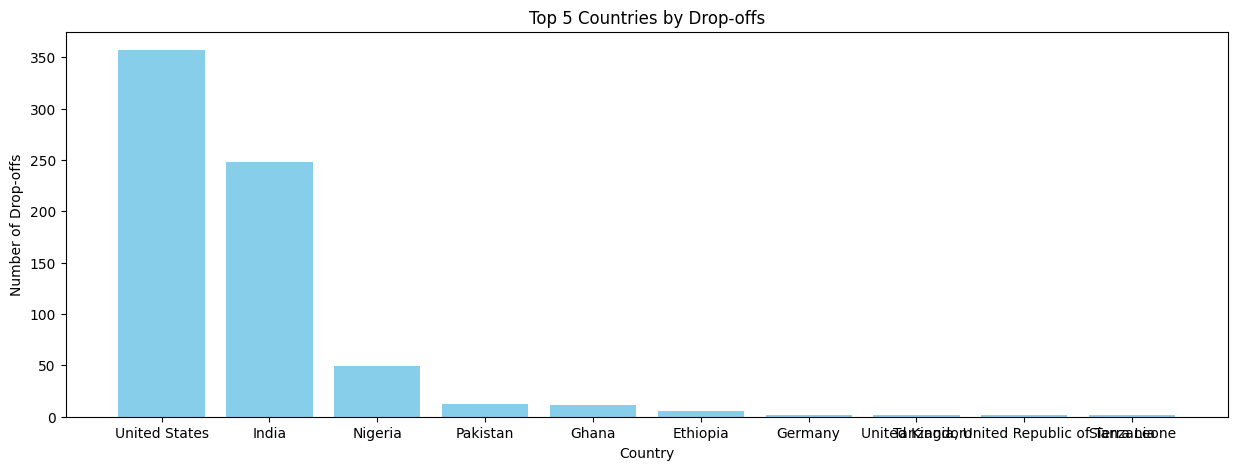

In [766]:
import matplotlib.pyplot as plt

# Bar chart for drop-offs by country
plt.figure(figsize=(15, 5))
plt.bar(dropoff_by_country.keys(), dropoff_by_country.values(), color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Drop-offs')
plt.title('Top 5 Countries by Drop-offs')
plt.show()

## Dropoffs by Major

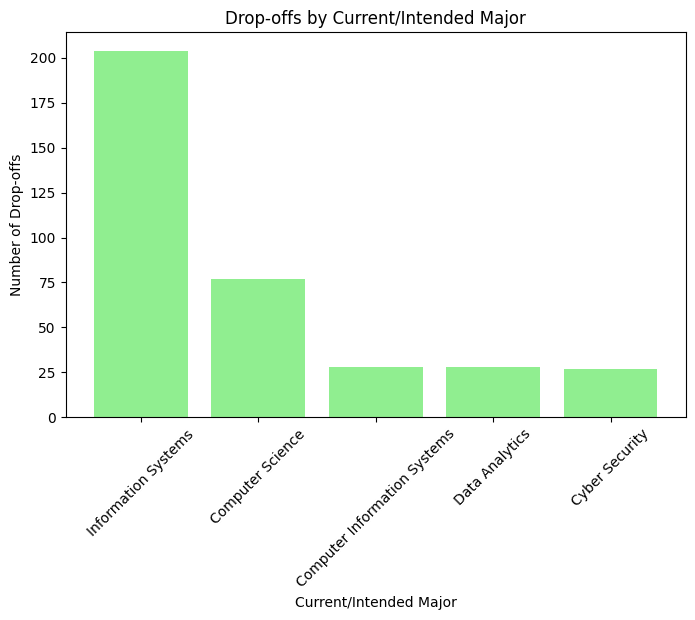

In [767]:
import matplotlib.pyplot as plt

# Bar chart for drop-offs by country
plt.figure(figsize=(8, 5))
plt.bar(dropoff_by_major.keys(), dropoff_by_major.values(), color='lightgreen')
plt.xlabel('Current/Intended Major')
plt.ylabel('Number of Drop-offs')
plt.title('Drop-offs by Current/Intended Major')
plt.xticks(rotation=45)
plt.show()

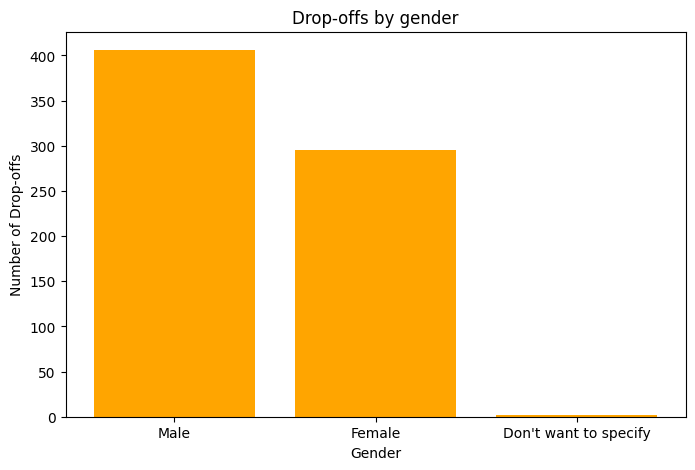

In [768]:
import matplotlib.pyplot as plt

# Bar chart for drop-offs by gender
plt.figure(figsize=(8, 5))
plt.bar(dropoff_by_gender.keys(), dropoff_by_gender.values(), color='orange')
plt.xlabel('Gender')
plt.ylabel('Number of Drop-offs')
plt.title('Drop-offs by gender')
plt.xticks(rotation=0)
plt.show()

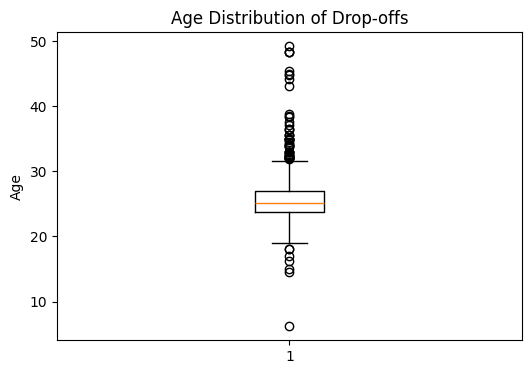

In [769]:
plt.figure(figsize=(6, 4))
plt.boxplot(dropoff_df['Age'].dropna())
plt.ylabel('Age')
plt.title('Age Distribution of Drop-offs')
plt.show()